# Final Exam: Part B

* Section: Sec01

* Group Number: S1G1: Mercedes Bischoff, Ryan Mandel, Bryce Owen, Kimberly Tang

* Due Date: May 7, 2020

* Purpose: Culmination of Semester Knowledge Base

## Preprocessing data

In [80]:
#--Load Libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [81]:
#--Import and Preview Data Set
plants = pd.read_excel('http://barney.gonzaga.edu/~chuang/data/plants.xlsx')
plants.head()

,ID,sepal_length,sepal_width,petal_length,petal_width,species
0,1,4.3,2.8,1.9,NaN,0
1,2,4.8,3.4,1.6,0.2,0
2,3,5.0,3.0,1.8,0.4,0
3,4,4.8,3.0,1.4,0.3,0
4,5,5.1,3.8,1.6,0.2,0


In [82]:
#--Identify Missing Data
plants.isnull().sum()

ID               0
sepal_length     1
sepal_width      5
petal_length    10
petal_width      8
species          0
dtype: int64

In [83]:
#--Identify records that have missing values
plants[plants.isnull().any(axis=1)]

,ID,sepal_length,sepal_width,petal_length,petal_width,species
0,1,4.3,2.8,1.9,NaN,0
32,33,5.4,2.9,1.7,NaN,0
35,36,5.7,3.6,NaN,0.2,0
38,39,5.3,NaN,1.4,0.2,0
39,40,4.7,NaN,NaN,NaN,0
46,47,4.6,3.0,NaN,0.5,0
62,63,NaN,3.1,1.8,0.3,0
67,68,5.2,3.8,NaN,0.4,0
102,103,5.2,2.7,NaN,0.5,0
115,116,5.5,2.4,3.7,NaN,1


In [84]:
#Fill all missing data with averages grouped by species
plants['sepal_length'] = plants['sepal_length'].fillna(plants.groupby('species')['sepal_length'].transform('mean'))
plants['sepal_width'] = plants['sepal_width'].fillna(plants.groupby('species')['sepal_width'].transform('mean'))
plants['petal_length'] = plants['petal_length'].fillna(plants.groupby('species')['petal_length'].transform('mean'))
plants['petal_width'] = plants['petal_width'].fillna(plants.groupby('species')['petal_width'].transform('mean'))
plants.head()

,ID,sepal_length,sepal_width,petal_length,petal_width,species
0,1,4.3,2.8,1.9,0.299057,0
1,2,4.8,3.4,1.6,0.200000,0
2,3,5.0,3.0,1.8,0.400000,0
3,4,4.8,3.0,1.4,0.300000,0
4,5,5.1,3.8,1.6,0.200000,0


In [85]:
#-- Standardize numeric variable by adding zscore columns
plants['sepal_length_z'] = stats.zscore(plants['sepal_length'], nan_policy = 'omit')
plants['sepal_width_z'] = stats.zscore(plants['sepal_width'], nan_policy = 'omit')
plants['petal_length_z'] = stats.zscore(plants['petal_length'], nan_policy = 'omit')
plants['petal_width_z'] = stats.zscore(plants['petal_width'], nan_policy = 'omit')

plants.head()

,ID,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_z,sepal_width_z,petal_length_z,petal_width_z
0,1,4.3,2.8,1.9,0.299057,0,-1.679790,-0.436789,-1.034591,-1.234960
1,2,4.8,3.4,1.6,0.200000,0,-1.121177,0.703984,-1.201071,-1.365184
2,3,5.0,3.0,1.8,0.400000,0,-0.897731,-0.056531,-1.090085,-1.102255
3,4,4.8,3.0,1.4,0.300000,0,-1.121177,-0.056531,-1.312058,-1.233719
4,5,5.1,3.8,1.6,0.200000,0,-0.786009,1.464498,-1.201071,-1.365184


In [86]:
#--Identify rows with zscores >3 or <-3
plants[(plants['sepal_length_z'] > 3) | 
        (plants['sepal_length_z'] < -3) |
        (plants['sepal_width_z'] > 3) | 
        (plants['sepal_width_z'] < -3) |
        (plants['petal_length_z'] > 3) | 
        (plants['petal_length_z'] < -3) |  
        (plants['petal_width_z'] > 3) | 
        (plants['petal_width_z'] < -3)]

,ID,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_z,sepal_width_z,petal_length_z,petal_width_z
106,107,4.800000,5.020648,1.8,0.200000,0,-1.121177,3.785301,-1.090085,-1.365184
116,117,8.900000,2.600000,3.3,1.300000,1,3.459455,-0.817046,-0.257685,0.080925
154,155,8.975003,2.900000,4.9,1.500000,1,3.543250,-0.246660,0.630209,0.343854
216,217,7.000000,4.974328,5.1,1.800000,1,1.336723,3.697233,0.741195,0.738247
261,262,9.157097,3.300000,5.2,2.400000,2,3.746691,0.513855,0.796688,1.527034
282,283,8.975003,3.800000,6.7,2.200000,2,3.543250,1.464498,1.629088,1.264105
294,295,6.700000,2.700000,5.0,4.052461,2,1.001555,-0.626917,0.685702,3.699432


In [87]:
#--Drop rows that conatin outliers
plants = plants.drop(plants[(plants['sepal_length_z'] > 3) | 
        (plants['sepal_length_z'] < -3) |
        (plants['sepal_width_z'] > 3) | 
        (plants['sepal_width_z'] < -3) |
        (plants['petal_length_z'] > 3) | 
        (plants['petal_length_z'] < -3) |  
        (plants['petal_width_z'] > 3) | 
        (plants['petal_width_z'] < -3)].index)
plants.shape

(319, 10)

In [88]:
#Find duplicate records
plants[plants.duplicated(subset=plants.columns.difference(['ID']))]

,ID,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_z,sepal_width_z,petal_length_z,petal_width_z
54,55,4.9,3.1,1.5,0.1,0,-1.009454,0.133597,-1.256565,-1.496648
91,92,4.9,3.1,1.5,0.1,0,-1.009454,0.133597,-1.256565,-1.496648


In [89]:
#Drop those records
plants.drop_duplicates(subset=plants.columns.difference(['ID']), inplace = True)
plants.shape

(317, 10)

In [90]:
#--Add Species Name Column to Data Set
def Species(x):
    if x == 0:
        return "setosa"
    elif x == 1:
        return "versicolor"
    else:
        return "virginica"

plants['SpeciesName'] = plants['species'].apply(Species)
plants.head()

,ID,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_z,sepal_width_z,petal_length_z,petal_width_z,SpeciesName
0,1,4.3,2.8,1.9,0.299057,0,-1.679790,-0.436789,-1.034591,-1.234960,setosa
1,2,4.8,3.4,1.6,0.200000,0,-1.121177,0.703984,-1.201071,-1.365184,setosa
2,3,5.0,3.0,1.8,0.400000,0,-0.897731,-0.056531,-1.090085,-1.102255,setosa
3,4,4.8,3.0,1.4,0.300000,0,-1.121177,-0.056531,-1.312058,-1.233719,setosa
4,5,5.1,3.8,1.6,0.200000,0,-0.786009,1.464498,-1.201071,-1.365184,setosa


## Explore Dataset

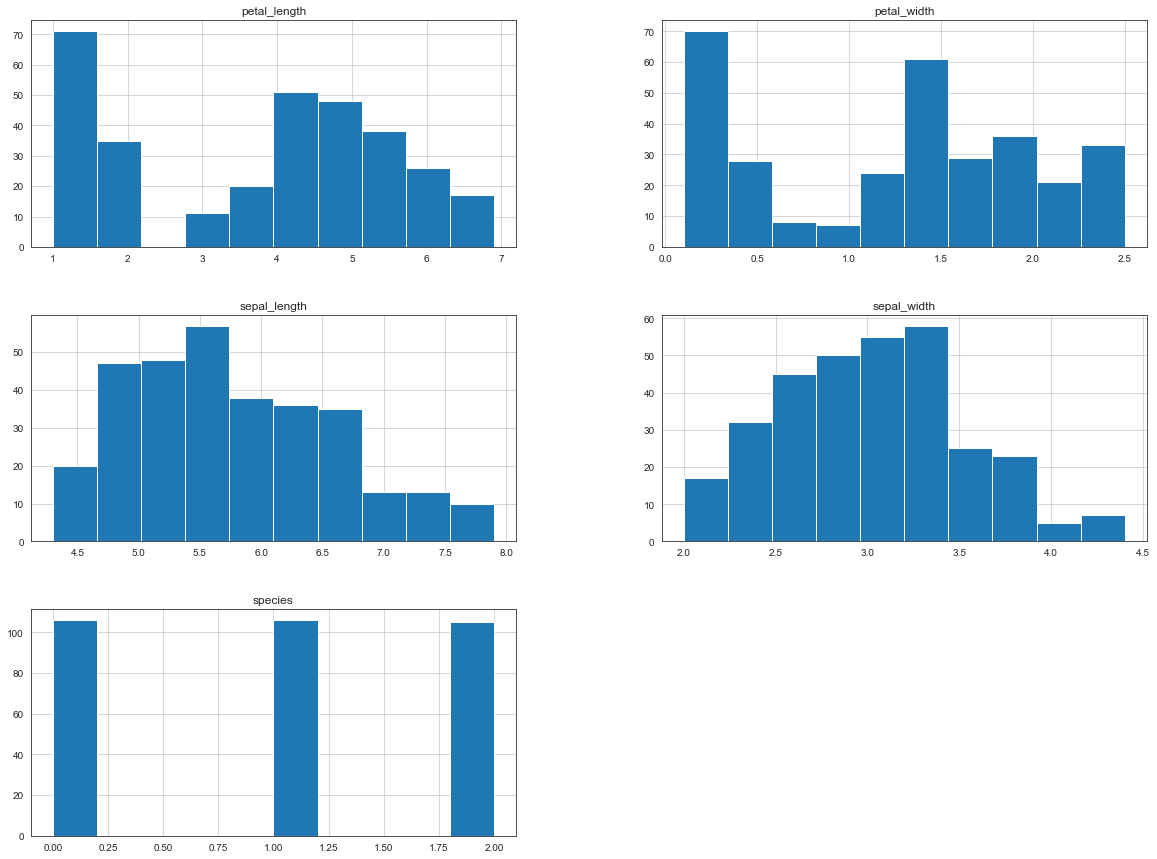

In [91]:
#--Histogram of Each Variable (Z score variables not needed because they are the same distribution as normal variables)
plants[['petal_length','petal_width','sepal_length','sepal_width','species']].hist(bins=10,figsize=(20,15))
plt.show()

In [92]:
#--Correlation Chart (Z score variables not needed because they are the same distribution as normal variables)
plants[['petal_length','petal_width','sepal_length','sepal_width','species']].corr().style.background_gradient("Greens")

,petal_length,petal_width,sepal_length,sepal_width,species
petal_length,1,0.933236,0.706361,-0.337176,0.950746
petal_width,0.933236,1,0.686138,-0.314986,0.939716
sepal_length,0.706361,0.686138,1,-0.160228,0.676827
sepal_width,-0.337176,-0.314986,-0.160228,1,-0.323291
species,0.950746,0.939716,0.676827,-0.323291,1


## Clustering

In [93]:
#Choose variabes to cluster and justify choice
# We chose to select the two variables with the strongest correlation to species, petal_length and petal_width

X = plants[['petal_length', 'petal_width']]
X.head()

,petal_length,petal_width
0,1.9,0.299057
1,1.6,0.200000
2,1.8,0.400000
3,1.4,0.300000
4,1.6,0.200000


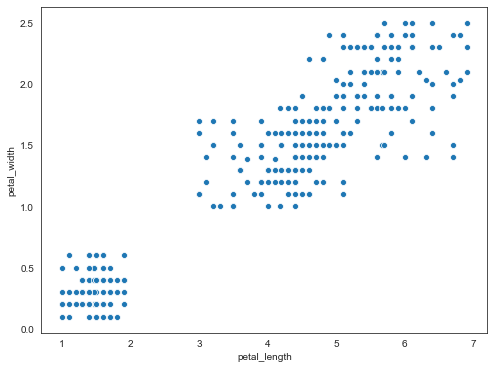

In [94]:
#Plot the distribution of sepal_length and petal_length
plt.figure(figsize=(8,6))
sns.scatterplot(X['petal_length'], X['petal_width'])

In [95]:
#Save means and standard deviations
#Used to standardize data of new plants for prediction
plants_mean = X.mean()
plants_std = X.std()
print(plants_mean)
print()
print(plants_std)

petal_length    3.760817
petal_width     1.230537
dtype: float64

petal_length    1.804528
petal_width     0.742804
dtype: float64


In [96]:
#Standardize the data
z_score = stats.zscore(X)
X_z = pd.DataFrame(z_score, columns = ['petal_length_z', 'petal_width_z'])
X_z.tail()

,petal_length_z,petal_width_z
312,1.686861,1.576880
313,0.687793,0.363339
314,1.686861,1.085716
315,0.965312,0.767852
316,0.743297,1.576880


In [97]:
#Fit a model with the data
#Create three clusters
from sklearn.cluster import KMeans

kmeans_plants = KMeans(n_clusters = 3).fit(X_z)

In [98]:
#Obtain the labels
cluster = kmeans_plants.labels_
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [99]:
#Obtain the centroids
cluster_center = kmeans_plants.cluster_centers_
cluster_center

array([[ 1.11418969,  1.12703719],
       [-1.27561714, -1.24966339],
       [ 0.27487366,  0.24182267]])

In [100]:
X_z.tail()

,petal_length_z,petal_width_z
312,1.686861,1.576880
313,0.687793,0.363339
314,1.686861,1.085716
315,0.965312,0.767852
316,0.743297,1.576880


In [101]:
#Merge original data, rescaled data and add column to label the results of clustering
clt = pd.DataFrame(cluster, columns=['cluster'])
plants_cluster = X.merge(X_z, on = X.index)
plants_cluster = pd.concat([plants_cluster, clt], axis = 1, sort = True)
plants_cluster = plants_cluster.rename(columns={'key_0': 'ID'})
plants_cluster.tail()

,ID,petal_length,petal_width,petal_length_z,petal_width_z,cluster
312,321,6.8,2.400000,1.686861,1.576880,0
313,322,5.0,1.500000,0.687793,0.363339,2
314,323,6.8,2.035738,1.686861,1.085716,0
315,324,5.5,1.800000,0.965312,0.767852,0
316,325,5.1,2.400000,0.743297,1.576880,0


In [102]:
#Preview the new dataset
plants_cluster.head()

,ID,petal_length,petal_width,petal_length_z,petal_width_z,cluster
0,0,1.9,0.299057,-1.032823,-1.255988,1
1,1,1.6,0.200000,-1.199335,-1.389553,1
2,2,1.8,0.400000,-1.088327,-1.119878,1
3,3,1.4,0.300000,-1.310342,-1.254716,1
4,4,1.6,0.200000,-1.199335,-1.389553,1


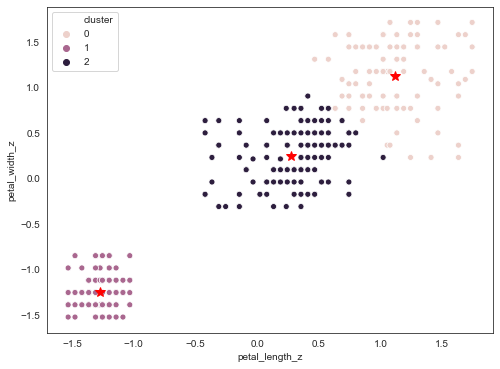

In [103]:
#Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(plants_cluster['petal_length_z'],
                plants_cluster['petal_width_z'],
                hue=plants_cluster['cluster'])

#Plot centroids of the clusters
plt.plot(cluster_center[:,0],
         cluster_center[:,1],
         'r*',
         markersize=10)
# Centroids marked with stars

In [104]:
#Predict plants
#Suppose we have 5 plants and they have the following measurements
#The data is saved in a list, each element of which has two values: width and length
plant_list = [[4.5, 2.3],
            [2.92, 1.5],
             [1.2, 0.3],
             [1.2, 0.5],
             [4.9, 2]]
#Convert the list to a dataframe
newplant = pd.DataFrame(plant_list,columns=['petal_length','petal_width'])
newplant

,petal_length,petal_width
0,4.50,2.3
1,2.92,1.5
2,1.20,0.3
3,1.20,0.5
4,4.90,2.0


In [105]:
#Standardize the measurements of new plants
newplant_z = (newplant-plants_mean)/plants_std
newplant_z = newplant_z.rename(columns={'petal_length': 'petal_length_z', 'petal_width': 'petal_width_z'})
newplant_z

,petal_length_z,petal_width_z
0,0.409627,1.439765
1,-0.465948,0.362765
2,-1.419106,-1.252735
3,-1.419106,-0.983485
4,0.631291,1.035890


In [106]:
#Prediction
preds = kmeans_plants.predict(newplant_z)
preds

array([0, 2, 1, 1, 0], dtype=int32)

In [107]:
#Interpretations
#The first plant belongs to the cluster of high petal_length and petal_width
#The second plant belongs to the cluster of medium petal_length and petal_width
#The thrid plant belongs to the cluster of low petal_length and petal_width
#The fourth plant belongs to the cluster of low petal_length and petal_width
#The fifth plant belongs to the cluster of high petal_length and petal_width

# Combine original data, standardized data and predicted clusters
combined_newplant = pd.concat([newplant, newplant_z, pd.DataFrame(preds, columns=['cluster'])], axis = 1)
combined_newplant

,petal_length,petal_width,petal_length_z,petal_width_z,cluster
0,4.50,2.3,0.409627,1.439765,0
1,2.92,1.5,-0.465948,0.362765,2
2,1.20,0.3,-1.419106,-1.252735,1
3,1.20,0.5,-1.419106,-0.983485,1
4,4.90,2.0,0.631291,1.035890,0


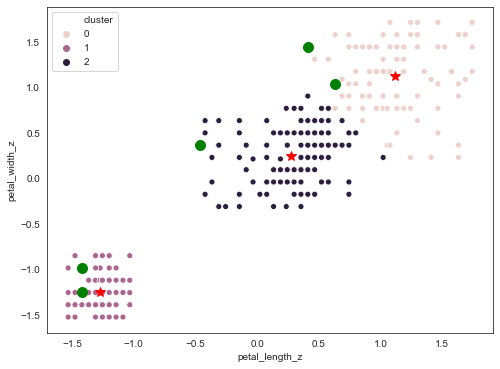

In [108]:
#Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(plants_cluster['petal_length_z'],
                plants_cluster['petal_width_z'],
                hue=plants_cluster['cluster'])

#Plot centroids of the clusters
plt.plot(cluster_center[:,0],
         cluster_center[:,1],
         'r*',
         markersize=10)

#Plot predictions
plt.plot(newplant_z.iloc[:,0],
         newplant_z.iloc[:,1],
         'go',
         markersize=10)

# Graph shows where predicted flowers should lie with green dots

## Classification

In [109]:
#--Preview Data and drop non-predictors
plants.drop(['ID','sepal_length_z','sepal_width_z','petal_length_z','petal_width_z','SpeciesName'], axis = 1, inplace = True)
plants.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.3,2.8,1.9,0.299057,0
1,4.8,3.4,1.6,0.200000,0
2,5.0,3.0,1.8,0.400000,0
3,4.8,3.0,1.4,0.300000,0
4,5.1,3.8,1.6,0.200000,0


In [110]:
# establish predictors
outcome = 'species'
predictors = [c for c in plants.columns if c != outcome]
predictors

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [111]:
# --Split training and testing
# Test size of 30% used which is around the industry standard
X = plants.drop('species',axis=1) # -- features --
y = plants['species']             # -- target --

x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3, 
                                                    random_state=1)


In [112]:
# -- train neural nets and fit model--
# Solver type is lbfgs
# Hidden layer sizes is 3
ann_clf = MLPClassifier(hidden_layer_sizes = (3), 
                        activation = 'logistic', 
                        solver = 'lbfgs', random_state = 1)

ann_clf.fit(x_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=3, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [113]:
# -- confusion matrix --

metrics.confusion_matrix(y_true = y_train, 
                         y_pred = ann_clf.predict(x_train))

array([[76,  0,  0],
       [ 0, 68,  1],
       [ 0,  2, 74]])

Text(0.5, 16.0, 'Predicted')

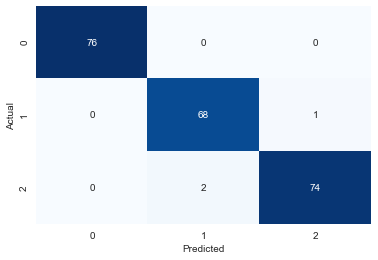

In [114]:
# -- Use sklearn.metrics to present confustion_matrix --

# -- use seaborn heatmapt to present the confusion matrix --
# -- This is based on TRAINING DATA --
%matplotlib inline

sns.heatmap(metrics.confusion_matrix(y_true = y_train, 
                                     y_pred = ann_clf.predict(x_train)),
                                    annot=True,
                                    cbar=False,
                                    fmt='g',
                                    cmap = plt.cm.get_cmap('Blues'))
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [115]:
# -- Validation performance --
# -- Use test data --
metrics.confusion_matrix(y_true = y_test,
                         y_pred=ann_clf.predict(x_test))

array([[30,  0,  0],
       [ 0, 35,  2],
       [ 0,  2, 27]])

--- Confusion Matrix (predict on rows, actual on columns ---


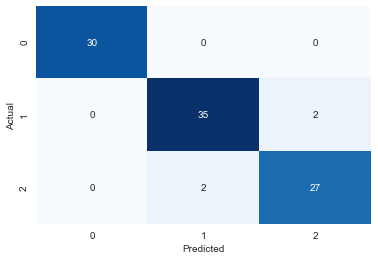

In [116]:
# --- Print Confusion Matrix Using Panda's crosstab function ---
sns.set_style('white')
print('--- Confusion Matrix (predict on rows, actual on columns ---')
cmtab = metrics.confusion_matrix(y_test,ann_clf.predict(x_test))

# confusion_matrix = pd.crosstab(preds, y_test,rownames=['Predicted'], colnames=['Actual'])
ax = sns.heatmap(cmtab, annot=True,fmt='g',cbar=False,cmap='Blues')
ax.set(xlabel="Predicted",ylabel="Actual");

# The confusion matrix shows that nearly all of the predicted values were correctly identified. There were 2 flowers 
# in classes 1 and 2 were misidentified. This is very minimal in the grand scheme of the dataset

In [117]:
# show metrics
print(metrics.classification_report(y_true = y_test, 
                                    y_pred = ann_clf.predict(x_test)))

# The model has high performance in all areas. Especially the accuracy, precision, and F1 score which are 
# good metrics for this model because our biggest concern is classifying flowers correctly and avoiding false positives 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.95      0.95      0.95        37
           2       0.93      0.93      0.93        29

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96

